In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


**Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [9]:
df.dtypes

,0
Gene One,float64
Gene Two,float64
Cancer Present,int64


In [4]:
df.shape

(3000, 3)

In [6]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

**Exploratory Data Analysis**

In [10]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: ylabel='Gene One'>

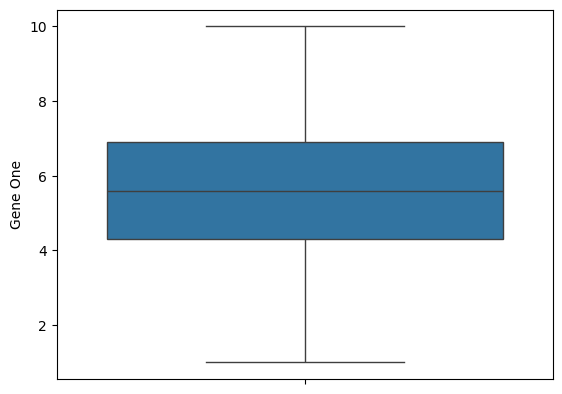

In [11]:
sns.boxplot(df['Gene One'])

<Axes: ylabel='Gene Two'>

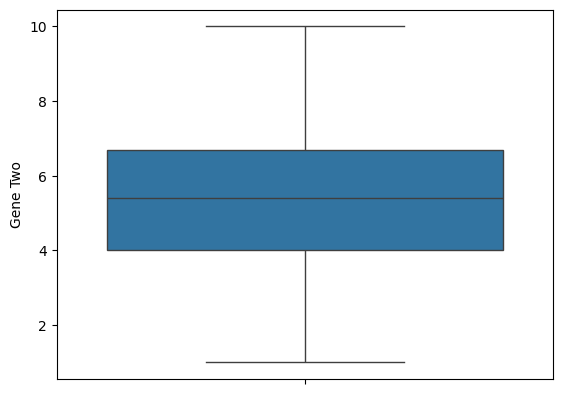

In [12]:
sns.boxplot(df['Gene Two'])

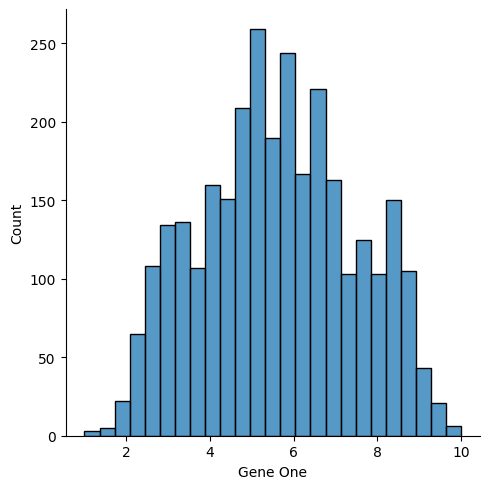

In [13]:
sns.displot(df['Gene One'])

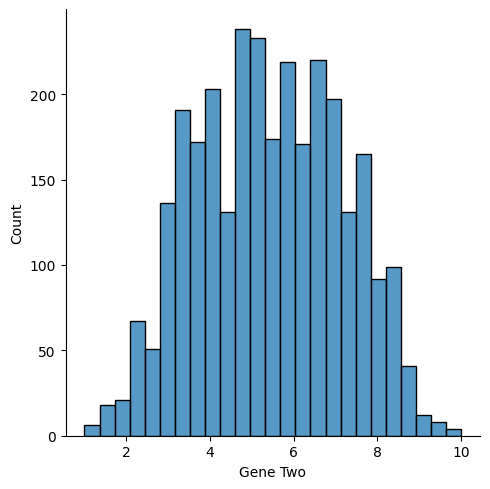

In [14]:
sns.displot(df['Gene Two'])

<Axes: xlabel='Cancer Present', ylabel='count'>

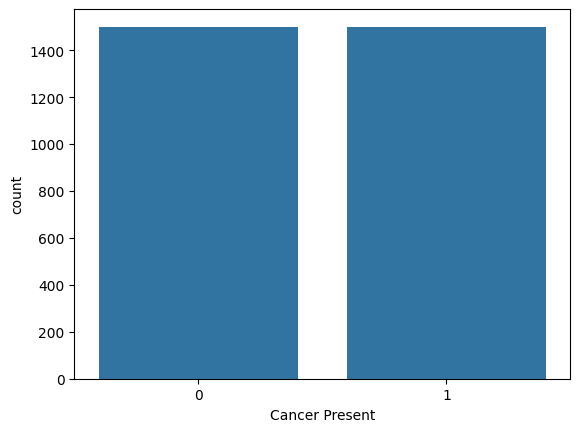

In [16]:
sns.countplot(data=df, x='Cancer Present')

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

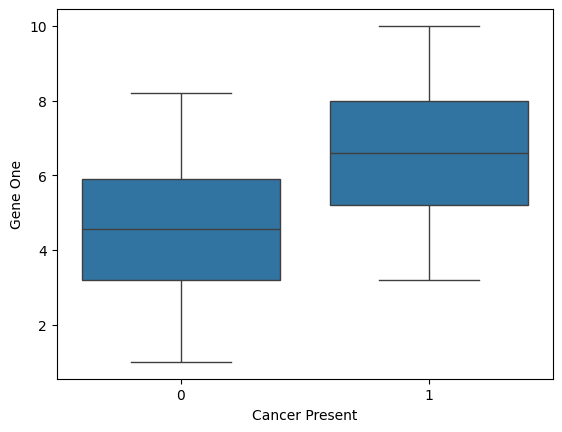

In [17]:
sns.boxplot(data=df, x='Cancer Present', y='Gene One')

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

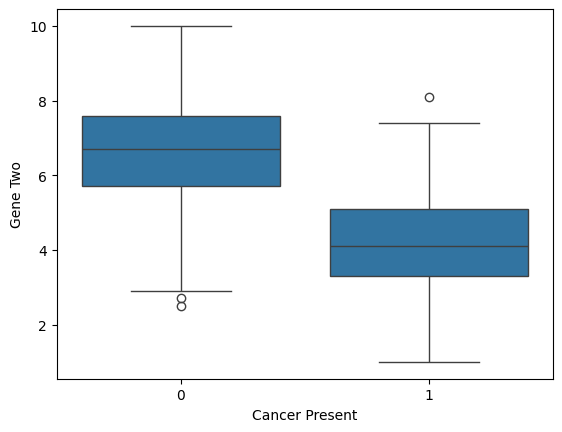

In [18]:
sns.boxplot(data=df, x='Cancer Present', y='Gene Two')

<Axes: xlabel='Gene One', ylabel='Gene Two'>

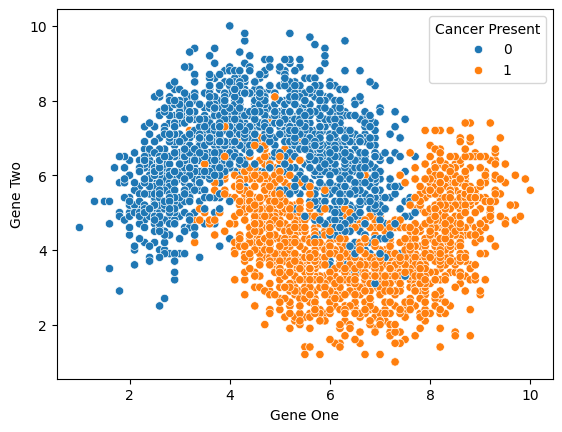

In [19]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

In [20]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


In [21]:
df['Gene One'].skew()

np.float64(0.0270424877389434)

In [22]:
df['Gene Two'].skew()

np.float64(0.0028707848389388888)

<Axes: >

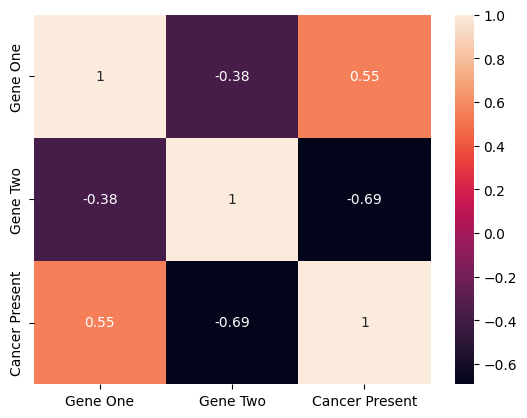

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
df.isnull().sum()

,0
Gene One,0
Gene Two,0
Cancer Present,0


**X & y**

In [26]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

**train_test split**

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**Modelling with default**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# prediction
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)


# evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train, ypred_train))
print("Test Accuracy: ",accuracy_score(y_test, ypred_test))

# cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, X, y, cv=5)
score
print("CV Score:", score.mean())


Train Accuracy:  0.9438095238095238
Test Accuracy:  0.9277777777777778
CV Score: 0.9276666666666668


In [36]:
test_acc=[]
for k in range(1, 31):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)
  ypred_train = knn_model.predict(X_train)
  ypred_test = knn_model.predict(X_test)
  Test_accuracy = accuracy_score(y_test, ypred_test)
  test_acc.append(Test_accuracy)
test_acc




[0.8911111111111111,
 0.9,
 0.9266666666666666,
 0.9244444444444444,
 0.9277777777777778,
 0.9333333333333333,
 0.9355555555555556,
 0.9355555555555556,
 0.9422222222222222,
 0.9366666666666666,
 0.9388888888888889,
 0.94,
 0.9388888888888889,
 0.9377777777777778,
 0.9411111111111111,
 0.9422222222222222,
 0.9433333333333334,
 0.9444444444444444,
 0.9466666666666667,
 0.9466666666666667,
 0.9455555555555556,
 0.9488888888888889,
 0.9455555555555556,
 0.9455555555555556,
 0.9433333333333334,
 0.9433333333333334,
 0.9444444444444444,
 0.9422222222222222,
 0.9422222222222222,
 0.9477777777777778]

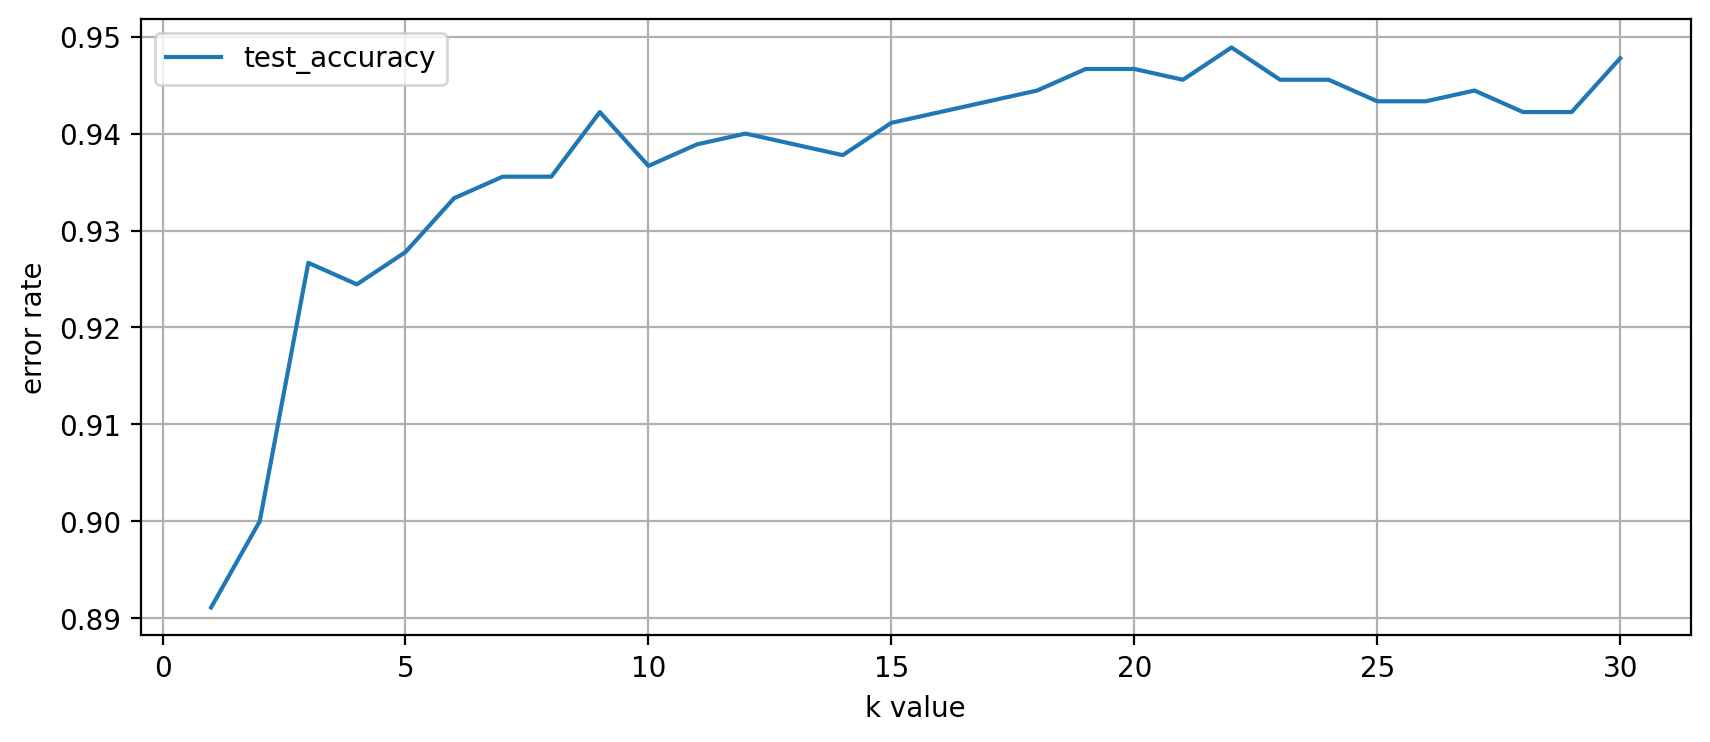

In [39]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),test_acc,label='test_accuracy')
plt.grid()
plt.ylabel('error rate')
plt.xlabel('k value')
plt.legend()

**modeling- hyperparameter tuning for KNN classifier**

In [45]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,31)),'p':[1,2]}
hpt_knn = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
hpt_knn.fit(X_train, y_train)
hpt_knn.best_params_

{'n_neighbors': 22, 'p': 2}

**Rebuilt KNN model with best hyperparameter tunning**

In [53]:
# model
knn_model = KNeighborsClassifier(n_neighbors = 22, p = 2)

knn_model.fit(X_train, y_train)

# prediction
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)


# evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train, ypred_train))
print("Test Accuracy: ",accuracy_score(y_test, ypred_test))

# cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, X, y, cv=5)
score
print("CV Score:", score.mean())


Train Accuracy:  0.9342857142857143
Test Accuracy:  0.9488888888888889
CV Score: 0.9353333333333333


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[452,  18],
       [ 28, 402]])

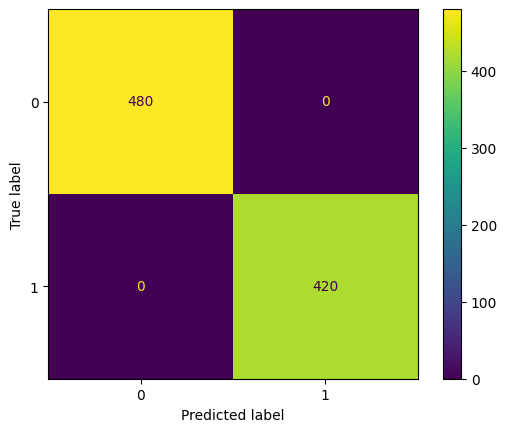

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn_model.predict(X_test)

cm = confusion_matrix(ypred_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

